<img src="https://drive.google.com/uc?export=view&id=1WpIuwT7ActKDLTILNYc4L1_2s20e8yMO" width=300/> 

# DS-1: Data Science Basics
## Homework 1: Who is the best singer ever?

**DS-1 Cohort 2** <br>
**Instructor: Prof. Igancio Becker, Dr. Pavlos Protopapas, Dr. Rahul Dave**<br>
**Max Score: 100** <br>

## Name of people who have worked on this homework:

## Instructions <a class="anchor" id="instructions"></a>

<hr style="height:2pt">

- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropriate plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

In [ ]:
#Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import json
import re
import requests
from bs4 import BeautifulSoup
from IPython.core.display import HTML
import seaborn as sns
import re
import pickle

# Part A: Constructing a year-song dataframe [30 points]

**Question 1:** Scrape and Parse Wikipedia for Billboard's Top 100 songs starting from 1992 to 2021.

**1.1** [3pts] Scrape Wikipedia's Billboard pages from 1992 to 2021.

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

- Use python's `requests` module to obtain (GET) the web pages at http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1992, http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1993 till http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2021. 


- Store the text from your `requests` in a dictionary called `yearstext`. 
This dictionary should have as its keys the years (as integers from 1992 to 2021), and as values corresponding to these keys the text of the page being fetched. 

  So each entry in `yearstext` will look something like this:

  <img src="https://drive.google.com/uc?export=view&id=1tOVPv_lVLOKtEnUgEvgxbWJlGvSKXcOZ" width=1500/> 

  where the key is 1992 and the value is the HTML at http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1992.


*Hint:* Put your requests.get() in a `for` loop and use the `time.sleep` function to wait one second between requests, you do not want Wikipedia to think you are a marauding bot attempting to mount a denial-of-service attack.

</details>


**1.2** [12pts] Parse the HTML retrieved to extract ranking, song and artist information. 

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

- Write a function `parse_year(year, yeartextdict)` that returns a dictionary.

  Here `year` should be the integer value of the year, and `yeartextdict` should be the HTML text for the corresponding webpage. 
  This function should return a dictionary of the following form:

  ```
  {'ranking': 32,
  'song': ['Hot Boyz (song)'],
  'songurl': ['/wiki/Hot_Boyz_(song)'],
  'titletext': '"Hot Boyz"',
  'band_singer': ['Missy Elliott', 'Nas', 'Eve (rapper)', 'Q-Tip (musician)'],
  'url': ['/wiki/Missy_Elliott',
    '/wiki/Nas',
    '/wiki/Eve_(rapper)',
    '/wiki/Q-Tip_(musician)']}
  ```
  Here, `url` should be the link for the singer or band (observe that on the web page, there is a link for every song and artist). We are extracting the `url` of the artist(s) to use at a later stage in the homework. `ranking` is the ranking of the song, `band_singer` should be the name of the artist(s) and `title` should be the title of the song. Also notice that the `titletext` is the contents of the table cell, and **retains the quotes** that wikipedia puts on the single. 

- Once the above function is created, generate a dictionary `yearinfo` to store the information extracted above for all of the years. `yearinfo` should be a dictionary with keys as years and values as a list of dictionaries generated by the function `parse_year`. The dictionary should be of the following form:

  ```
  {'1992': [{'band_singer': ['Boyz II Men'],
   'ranking': 1,
   'song': ['End of the Road (Boyz II Men song)'],
   'songurl': ['/wiki/End_of_the_Road_(Boyz_II_Men_song)'],
   'titletext': '"End of the Road"',
   'url': ['/wiki/Boyz_II_Men']},
  {'band_singer': ['Sir Mix-a-Lot'],
   'ranking': 2,
   'song': ['Baby Got Back'],
   'songurl': ['/wiki/Baby_Got_Back'],
   'titletext': '"Baby Got Back"',
   'url': ['/wiki/Sir_Mix-a-Lot']},....]
   ...

   '1993': [{'band_singer': ['Whitney Houston'],
   'ranking': 1,
   'song': ['I Will Always Love You'],
   'songurl': ['/wiki/I_Will_Always_Love_You#Whitney_Houston_version'],
   'titletext': '"I Will Always Love You"',
   'url': ['/wiki/Whitney_Houston']},
  {'band_singer': ['Tag Team (group)'],
   'ranking': 2,
   'song': ['Whoomp! (There It Is)'],
   'songurl': ['/wiki/Whoomp!_(There_It_Is)'],
   'titletext': '"Whoomp! (There It Is)"',
   'url': ['/wiki/Tag_Team_(group)']},...]
   ...
   ...

   '2021': [{'band_singer': ['Dua Lipa'],
   'ranking': 1,
   'song': ['Levitating (song)'],
   'songurl': ['/wiki/Levitating_(song)'],
   'titletext': '"Levitating"',
   'url': ['/wiki/Dua_Lipa']},
  {'band_singer': ['The Weeknd', 'Ariana Grande'],
   'ranking': 2,
   'song': ['Save Your Tears'],
   'songurl': ['/wiki/Save_Your_Tears'],
   'titletext': '"Save Your Tears"',
   'url': ['/wiki/The_Weeknd', '/wiki/Ariana_Grande']},...]
  ```
<br>

  **Note:** Here are some other issues that you will need to take care of while parsing:

    i. The example shown above has several artists for a single song. In this case, the `band_singer` and `url` would be a list of items.

    ii. Some singles might even have multiple songs because of the way the industry works:
    ```
    {'ranking': 98,
    'song': ["You're Makin' Me High", 'Let It Flow (song)'],
    'songurl': ['/wiki/You%27re_Makin%27_Me_High', '/wiki/Let_It_Flow_(song)'],
    'titletext': '"You\'re Makin\' Me High" / "Let It Flow"',
    'band_singer': ['Toni Braxton'],
    'url': ['/wiki/Toni_Braxton']}
    ```
    (See 1997 for an example)

    iii. Some songs don't have a URL. In this case, assume there is one song in the single, set `songurl` to [`None`] and the song name to the contents of the table cell with the quotes stripped:
    ```
    {'ranking': 45,
      'song': ['Say It'],
      'songurl': [None],
      'titletext': '"Say It"',
      'band_singer': ['Voices of Theory'],
      'url': ['/wiki/Voices_of_Theory']}
    ```
    (See 1998 for an example)

</details>
<br> 

**Question 2:** Construct a DataFrame from parsed data

**2.1** [10pts] Construct a dataframe from the dictionary `yearinfo`.

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

- Construct a dataframe from the dictionary created in the previous section `yearinfo`. Name this dataframe `billboardtop`.<br><br>
  Keep in mind, in the data structure we have so far, a given key can have a list of values with multiple entries. Also, our data is grouped by year. So we need a way to flatten this data into a format that will create a useful DataFrame. 
  Your final dataframe `billboardtop` should look something like this:

  <img src="https://drive.google.com/uc?export=view&id=1adDiuSmHXR7B7YO2ZNT_OJ9QejUyuJAC" width=1500/>

- Ensure that all lists in your dictionary are in different rows. <br>
  For example, a single containing two artists should be two different rows:
  <img src="https://drive.google.com/uc?export=view&id=1hxGXmP20vJ5i1N7WDg_pZBYly7gX2Gz0" width=1500/>

  A single containing two titles (1997, Rank 98) should be two different rows:
  <img src="https://drive.google.com/uc?export=view&id=1nRrDQOixcH4HfahfA9YF7R7brm_OyD7d" width=1500/>

</details>

**2.2** [3pts] Check your dataframes data types and convert them to the correct data types if needed.

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

- Check dataframe data types using ```dtypes```.
- Convert them to the correct data types if needed using the ```astype()``` function.

</details>

**2.3** [2pts] Store this dataframe so you won't need to run this again!

### Solutions

#### Question 1: Scrape and Parse Wikipedia for Billboard Top 100

**1.1** Scrape Wikipedia's Billboard Top 100 song pages from 1992 to 2021.

In [ ]:
# your code here 
pages = {}
yearstext = {}
year = [1992,1993,2021]
wik_page = ["http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1992","http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_1993","http://en.wikipedia.org/wiki/Billboard_Year-End_Hot_100_singles_of_2021"]
for i in range(1,4):
    pages[i] = requests.get(wik_page[i-1])
    yearstext[year[i-1]] = pages[i].text
    time.sleep(1)


**1.2** Parse the HTML retrieved to extract ranking, song and artist information. 

Now create a function for the above so i can do it for all years

In [ ]:
"""
Function
--------
parse_year

Inputs
------
year: the year you want the singles for
ytextdixt: a dictionary with keys as integer years and values the downloaded web pages 
    from wikipedia for that year.
   
Returns
-------

a list of dictionaries, each of which corresponds to a single and has the
following data:

Eg:

{'band_singer': ['Brandy', 'Monica'],
  'ranking': 2,
  'song': ['The Boy Is Mine'],
  'songurl': ['/wiki/The_Boy_Is_Mine_(song)'],
  'titletext': '" The Boy Is Mine "',
  'url': ['/wiki/Brandy_Norwood', '/wiki/Monica_(entertainer)']}
  
A dictionary with the following data:
    band_singer: a list of bands/singers who made this single
    song: a list of the titles of songs on this single
    songurl: a list of the same size as song which has urls for the songs on the single 
        (see point 3 above)
    ranking: ranking of the single
    titletext: the contents of the table cell
    band_singer: a list of bands or singers on this single
    url: a list of wikipedia singer/band urls on this single: only put in the part 
        of the url from /wiki onwards
    
"""

field = ["ranking", "song", "songurl", "titletext", "band_singer", "url"]
year_list = []
# your code here 
def parse_year(year, yearstext):
    year_list = []
    info = []
    soup = BeautifulSoup(yearstext[1992], "html.parser")
    info = soup.find_all("td")
    info_dict = {}
    for i in range(len(info)):
        if i%3==0 and i!=0:
            year_list.append(info_dict)
            info_dict = {}
        x = info[i].find("a")
        if i%3 == 0:
            info_dict[field[0]]=info[i].get_text()
            x= 1
        if i%3 == 1:
            if x== None:
                info_dict[field[3]] = info[i].get_text()
                info_dict[field[1]] = info[i].get_text()
                info_dict[field[2]] = "None"
            else:
                info_dict[field[3]]  = x.get_text()
                info_dict[field[1]]  = x.get_text()
                info_dict[field[2]] = x.get("href")
        if i%3 == 2:
            info_dict[field[4]]  = x.get_text()
            info_dict[field[5]]  = x.get("href")
    return year_list

In [ ]:
yearinfo = {}
yearinfo = dict((i,parse_year(i,yearstext)[:100])for i in year)

Save this dictionary as a json file so you do not need to run it over and over again.

In [ ]:
# your code here 
import pickle
with open('/content/drive/MyDrive/yearinfo.json', 'wb') as fp:
    pickle.dump(yearinfo, fp)

#### Question 2: Construct a DataFrame from parsed data

**2.1** Construct a dataframe from the dictionary ```yearinfo```

In [ ]:
# your code here 
with open('/content/drive/MyDrive/yearinfo.json', 'rb') as fp:
    data = pickle.load(fp)
new_fields = ["year","ranking", "song", "songurl", "titletext", "band_singer", "url"]
flat_data ={}
for year, yeardict in data.items():
    for d in yeardict:
        flat_data.setdefault("year", []).append(year)
        for key, value in d.items():
            flat_data.setdefault(key, []).append(value)
billboardtop = pd.DataFrame.from_dict(flat_data)

In [ ]:
billboardtop.head()

,year,ranking,titletext,song,songurl,band_singer,url
0,1992,1,End of the Road,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),Boyz II Men,/wiki/Boyz_II_Men
1,1992,2,Baby Got Back,Baby Got Back,/wiki/Baby_Got_Back,Sir Mix-a-Lot,/wiki/Sir_Mix-a-Lot
2,1992,3,Jump,Jump,/wiki/Jump_(Kris_Kross_song),Kris Kross,/wiki/Kris_Kross
3,1992,4,Save the Best for Last,Save the Best for Last,/wiki/Save_the_Best_for_Last,Vanessa Williams,/wiki/Vanessa_L._Williams
4,1992,5,Baby-Baby-Baby,Baby-Baby-Baby,/wiki/Baby-Baby-Baby,TLC,/wiki/TLC_(band)


**2.2** Check your dataframes data types and convert them to the correct data types if needed. 

In [ ]:
# your code here 
billboardtop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         300 non-null    int64 
 1   ranking      300 non-null    object
 2   titletext    300 non-null    object
 3   song         300 non-null    object
 4   songurl      300 non-null    object
 5   band_singer  300 non-null    object
 6   url          300 non-null    object
dtypes: int64(1), object(6)
memory usage: 16.5+ KB


In [ ]:
billboardtop["ranking"] = billboardtop.ranking.astype("int64")

In [ ]:
billboardtop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         300 non-null    int64 
 1   ranking      300 non-null    int64 
 2   titletext    300 non-null    object
 3   song         300 non-null    object
 4   songurl      300 non-null    object
 5   band_singer  300 non-null    object
 6   url          300 non-null    object
dtypes: int64(2), object(5)
memory usage: 16.5+ KB


**2.3** Store this dataframe so you won't need to run this again!

The easiest way is to pickle it using to_pickle:

In [ ]:
# your code here 
billboardtop.to_pickle("billboardtop.pkl")

# Part B: Constructing a year-song-singer dataframe [30 points]

Now, we need to fetch information about the singers or bands for all the songs we have in the `billboardtop` dataframe.

**Question 1:** Scrape and Parse Wikipedia for information about Artists and Bands

**1.1** Scrape the artist's Wikipedia webpages.

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

Since we have hundreds of artists webpages to scrape, we have created a function which implements caching in order to speed up this process.

The cache object urlcache that will avoid redundant HTTP requests (e.g. an artist might have multiple singles on a single year, or be on the list over a span of years). **Remember that this function is designed to be used in a loop over years, and then a loop over songs per year.** Since network requests are relatively slow, if we have already requested for a singer or band's wikipedia page, caching the results is a smart thing to do.

Notice that we have wrapped the call in an exception block. If the request gets an HTTP code different from 200, the cells for that URL will have a value of 1; and if the request completely fails (e.g. no network connection) the cell will have a value of 2. This will allow you to analyse the failed requests.

</details>

**1.2** [15pts] Parse the HTML retrieved to extract genre of the artist, date of birth, years active and other artist information.

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

- Write a function `singer_band_info(url, page_text)` that returns a dictionary. 

  Here `url` should be the the url corresponding to the singer's Wikipedia page (same as the previous dataframe `billboardtop`), and page_text should be the HTML text for the corresponding artist's webpage. This function should return a dictionary which contains the following information:

  1. The genres of the band or singer. These genres should be urls, to ensure their uniqueness. Create a list, `genres`, of these urls. If there are no genres, use `['NA']`.

  2. If the page has the text "Born", extract the element with the class `.bday`. If there is no "Born", store `False`. Store either of these into the variable `born`. 

  3. If the text "Years active" is found, but there is no birthday, assume a band. Store the years active into the variable `ya`, or `False` if the text is not found. 

  The dictionary returned should be of the form:
  ```
  { 'url': '/wiki/Boyz_II_Men', 
  'genres': ['/wiki/Contemporary_R%26B_music', '/wiki/Soul_music', '/wiki/New_jack_swing'], 
  'born': None, 
  'ya': '1987–present'}
  ```
- Once the above function is created, generate a list `singer_band_info_list` to store the information extracted above. `singer_band_info_list` should be a list of the dictionaries that the function `singer_band_info` returns. The list should look something like this:
```
  'genres': ['/wiki/Contemporary_R%26B_music',
   '/wiki/Soul_music',
   '/wiki/New_jack_swing'],
  'url': '/wiki/Boyz_II_Men',
  'ya': '1987–present'},
 {'born': None,
  'genres': ['/wiki/Pop_music',
   '/wiki/Electronica_music',
   '/wiki/Dance_music',
   '/wiki/Rave_music',
   '/wiki/House_music'],
  'url': '/wiki/KWS_(band)',
  'ya': '1991–1994'},
 ... and so on]
  ```
<br>

  **Note:** Wikipedia has changed it's format along the years! So observing one artist's webpage and building your function based on it will probably give you tons of errors. Here are a few issues to remember while parsing:

    1. There are several artists that take a sabbatical between their active years (https://en.wikipedia.org/wiki/Tony!_Toni!_Ton%C3%A9!). To get the right data, write a function to calculate the longest period of time they were active and consider that as your variable `years active`. In the example give, this would be 2003–present.
    2. Birthday's are given in different formats for different pages. For example - https://en.wikipedia.org/wiki/Sir_Mix-a-Lot and https://en.wikipedia.org/wiki/Ed_Sheeran have different formats. To ensure that you get the right day, look for the 'span' tag with a 'bday' tag and ensure that there are no paranthesis around the extracted text.
    3. Year's active are also given in different formats. For example - https://en.wikipedia.org/wiki/Boyz_II_Men and https://en.wikipedia.org/wiki/Ed_Sheeran are different. You could use regex ("[0-9]{4}[–][0-9]{4}" and "[0-9]{4}[–][0-9]{4}") to ensure you are getting the right years.

  Definitely do look at your outputs as you are parsing as it can identify several edge cases you have not considered in your code.

</details>

**Question 2:** Construct a DataFrame from parsed data

**2.1** [3pts] Construct a dataframe from the list `singer_band_info_list` and convert them to the correct data types if needed.

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

- Construct a dataframe from the list created in the previous section yearinfo. Name this dataframe `singerbandinfo`.

  Your dataframe `singerbandinfo` should look something like this:

  <img src="https://drive.google.com/uc?export=view&id=1LZh_J-LsB2p9UW7lCJaSbPNMTH-Bv61p" width=1500/> 

- Check dataframe data types using dtypes.
- Convert them to the correct data types if needed using the astype() function.


</details>

**2.2** [2pts] Merge `billboardtop` and `singerbandinfo` to create one dataframe.

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

- Merge the artist/song data frames into one large dataframe named `finaldf` on url. Your  dataframe should look something like this:
  <img src="https://drive.google.com/uc?export=view&id=1JMoV2gvIpIQ4tDGwidT7eAGKGusF8V0Z" width=1500/> 

  Note that this has an effect of imputing to a song all the genres that the artist is active in. We know that this is not true, but it is the simplest assumption we can make, and is probably good for most artists.

</details>

**2.3** [10pts] Perform feature engineering on `finaldf`.

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

- Encode genre: Update the dataframe by adding a column for each genre with 1-0 encoding for each row. This means, we want columns like "/wiki/Alternative_Rock", "/wiki/Acid_jazz", where if an artist is in that genre, the dataframe cell has a 1. Otherwise, it has a 0.

  Remember that an artist/band can be in multiple genres, and must have a 1 for each column corresponding to these genres, and 0 otherwise. This will widen the dataframe by the total number of genres that we have. 

  The final dataframe will look a bit like this:

  <img src="https://drive.google.com/uc?export=view&id=1r9G78REnrjRmhc9o6rOx62fuJJAjyt7w" width=1500/>

</details>

### Solutions

#### Question 1: Scrape and Parse Wikipedia for information about Artists and Bands

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
billboardtop = pd.read_pickle("/content/drive/MyDrive/billboardtop.pkl")

ValueError: ignored

In [ ]:
billboardtop.head()

,year,ranking,titletext,song,songurl,band_singer,url
0,1992,1,End of the Road,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),Boyz II Men,/wiki/Boyz_II_Men
1,1992,2,Baby Got Back,Baby Got Back,/wiki/Baby_Got_Back,Sir Mix-a-Lot,/wiki/Sir_Mix-a-Lot
2,1992,3,Jump,Jump,/wiki/Jump_(Kris_Kross_song),Kris Kross,/wiki/Kris_Kross
3,1992,4,Save the Best for Last,Save the Best for Last,/wiki/Save_the_Best_for_Last,Vanessa Williams,/wiki/Vanessa_L._Williams
4,1992,5,Baby-Baby-Baby,Baby-Baby-Baby,/wiki/Baby-Baby-Baby,TLC,/wiki/TLC_(band)


**1.1** Scrape the artist's Wikipedia webpages.

In [ ]:
urlcache={}
def get_page(url):
    if (url not in urlcache) or (urlcache[url]==1) or (urlcache[url]==2):
        time.sleep(1)
        try:
            r = requests.get("http://en.wikipedia.org%s" % url)
            if r.status_code == 200:
                urlcache[url] = r.text
            else:
                urlcache[url] = 1
        except:
            urlcache[url] = 2
    return urlcache[url]

Before we apply our function to the dataframe, let us sort `billboardtop` by year. This will ensure that we will hit the cache most as singers who show up repeatedly in the rankings will have their information already pulled.

In [ ]:
billboardtop=billboardtop.sort_values('year')
billboardtop.head()

,year,ranking,titletext,song,songurl,band_singer,url
0,1992,1,End of the Road,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),Boyz II Men,/wiki/Boyz_II_Men
72,1992,73,Blowing Kisses in the Wind,Blowing Kisses in the Wind,/wiki/Blowing_Kisses_in_the_Wind,Paula Abdul,/wiki/Paula_Abdul
71,1992,72,Everything About You,Everything About You,/wiki/Everything_About_You_(Ugly_Kid_Joe_song),Ugly Kid Joe,/wiki/Ugly_Kid_Joe
70,1992,71,Friday I'm in Love,Friday I'm in Love,/wiki/Friday_I%27m_in_Love,The Cure,/wiki/The_Cure
69,1992,70,Do I Have to Say the Words?,Do I Have to Say the Words?,/wiki/Do_I_Have_to_Say_the_Words%3F,Bryan Adams,/wiki/Bryan_Adams


In [ ]:
# Here we are populating the url cache
# Note that this function will take around 20 minutes to run as we are requesting for several pages
# This function is designed to be run again and again: it just tries to make sure that there are no unresolved pages left. 
billboardtop["url"].apply(get_page)

0      <!DOCTYPE html>\n<html class="client-nojs" lan...
72     <!DOCTYPE html>\n<html class="client-nojs" lan...
71     <!DOCTYPE html>\n<html class="client-nojs" lan...
70     <!DOCTYPE html>\n<html class="client-nojs" lan...
69     <!DOCTYPE html>\n<html class="client-nojs" lan...
                             ...                        
227    <!DOCTYPE html>\n<html class="client-nojs" lan...
226    <!DOCTYPE html>\n<html class="client-nojs" lan...
298    <!DOCTYPE html>\n<html class="client-nojs" lan...
235    <!DOCTYPE html>\n<html class="client-nojs" lan...
299    <!DOCTYPE html>\n<html class="client-nojs" lan...
Name: url, Length: 300, dtype: object

In [ ]:
# Let us make sure that there are no unresolved pages
# The sum below should be 0, and the boolean True. If that is not the case, run the above cell again until you get a sum of 0 and a boolean True
print (np.sum([(urlcache[k]==1) or (urlcache[k]==2) and isinstance(k,str) for k in urlcache]))
print ("Did we get all the URLs?",len(billboardtop.url.unique())==len(urlcache))

0
Did we get all the URLs? True


In [ ]:
# Let's save the `urlcache` and remove the old object. 
# your code here 
with open('/content/drive/MyDrive/urlcache.json', 'wb') as fp:
    pickle.dump(urlcache, fp)

**1.2** Parse the HTML retrieved to extract genre of the artist, date of birth, years active and other artist information.

Before parsing, it is important to note that Wikipedia has defined the same genre in a few different ways. Your parsing code will pick these up as different and new as they all differ with the alphabet case or an underscore instead of a hyphen.

We have defined a function to ensure that we have the correct representation of the number of artists in a particular genre. 

In [ ]:
genres_duplicates={'/wiki/Adult_Contemporary_music':'/wiki/Adult_contemporary',
 '/wiki/Adult_contemporary_music':'/wiki/Adult_contemporary',
'/wiki/Afrobeat':'/wiki/Afrobeats',
'/wiki/Alternative_rock':'/wiki/Alternative_Rock',
'/wiki/Avant-garde':'/wiki/Avant-garde_music',
'/wiki/Blues':'/wiki/Blues_music',
'/wiki/Comedy_hip-hop':'/wiki/Comedy_hip_hop',
'/wiki/Contemporary_R%26B':'/wiki/Contemporary_R%26B_music',
'/wiki/Contemporary_folk':'/wiki/Contemporary_folk_music',
'/wiki/Country_Folk':'/wiki/Country_folk',
'/wiki/Dance_pop':'/wiki/Dance-pop',
'/wiki/East_Coast_hip_hop':'/wiki/East_coast_hip_hop',
'/wiki/Electronic_Dance_Music':'/wiki/Electronic_dance_music',
'/wiki/Electronica':'/wiki/Electronica_music',
'/wiki/Emo':'/wiki/Emo_music',
'/wiki/Electropop':'/wiki/Electro-pop',
'/wiki/Folk-pop':'/wiki/Folk_pop',
'/wiki/Funk':'/wiki/Funk_music',
'/wiki/Grime_(music_genre)':'/wiki/Grime_music',
'/wiki/Gangsta_Rap':'/wiki/Gangsta_rap',
'/wiki/Hip_Hop_music': '/wiki/Hip_hop','/wiki/Hip_hop_music':'/wiki/Hip_hop',
'/wiki/Hyphy':'/wiki/Hyphy_music',
'/wiki/Latin_music':'/wiki/Latin_music_(genre)',
'/wiki/West_Coast_hip_hop':'/wiki/West_coast_hip_hop',
'/wiki/Southern_Hip_Hop':'/wiki/Southern_hip_hop',
'/wiki/Ska':'/wiki/Ska_music',
'/wiki/Pop-rock':'/wiki/Pop_rock',
'/wiki/Pop_Music':'/wiki/Pop_music',
'/wiki/Nu_metal':'/wiki/Nu_metal_music',
'/wiki/Hard_Rock':'/wiki/Hard_rock',
'/wiki/Pop_Rock':'/wiki/Pop_rock',
'/wiki/Post-Grunge':'/wiki/Post-grunge',
'/wiki/SoundCloud_rap':'/wiki/Soundcloud_rap'}

def genre_duplicates(genres):
    for i in range(len(genres)):
        if genres[i] in genres_duplicates.keys():
            genres[i]=genres_duplicates[genres[i]]
    return genres 

Please write the function `singer_band_info` according to the following specification.

In [ ]:
"""
Function
--------
singer_band_info

Inputs
------
url: the url
page_text: the text associated with the url
   
Returns
-------
A dictionary with the following data:
    url: copy the input argument url into this value
    genres: the genres that the band or singer works in
    born: the artist's birthday
    ya: years active variable

Notes
-----
See description above. Also note that some of the genres urls might require a 
bit of care and special handling.
"""
# your code here 
def singer_band_info(url, page_text):
    flag = "None"
    info_dict = {}
    info_dict["url"] = url
    soup = BeautifulSoup(page_text, "html.parser")
    table_rows = soup.find_all("tr")
    for i in table_rows:
        th = i.find("th", attrs ={"class":"infobox-label"})
        if th!= None:
            #print(th.get_text())
            z =th.get_text()
            if z == "Years active":
                info_dict["ya"] = i.find("td",attrs={"class":"infobox-data"}).get_text()
            if z == "Genres":
                #print(i.find("td",attrs={"class":"infobox-data"}).get_text())
                li = i.find("td",attrs={"class":"infobox-data"})
                li = li.find_all("a")
                for k in li:
                    info_dict.setdefault("genre", []).append(k.get("href"))
            if "ya" not in info_dict.keys():
                info_dict["ya"] = "None"
        table_d = i.find_all("td", attrs={"class":"infobox-data"})
        for j in table_d:
            try:
                born = i.find("span", attrs = {"class":"bday"}).get_text()
            except:
                born = "None"
            if(born != "None"):
                flag = born #make sure no parenthesis later
    if "genre" not in info_dict.keys():
        info_dict["genre"] = "None"
    info_dict["born"] = flag
    return info_dict

In [ ]:
singer_band_info_list = []
for key, value in urlcache.items():
    x = singer_band_info(key, urlcache[key])
    if x["genre"] != "None":
      x["genre"] = genre_duplicates(x["genre"])
    singer_band_info_list.append(x)

In [ ]:
#Store the list and delete the variable
with open("/content/drive/MyDrive/singer_band_info_list", "wb") as fp:   #Pickling
    pickle.dump(singer_band_info_list, fp)

In [ ]:
with open("/content/drive/MyDrive/singer_band_info_list", "rb") as fp:   # Unpickling
    singer_band_info_list = pickle.load(fp)


#### Question 2: Construct a DataFrame from parsed data

**2.1** Construct a dataframe from the list `singer_band_info_list`.

In [ ]:
# your code here 
df = pd.DataFrame(singer_band_info_list)

In [ ]:
df.head()

,url,ya,genre,born
0,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None
1,/wiki/Paula_Abdul,None,"[/wiki/Contemporary_R%26B_music, /wiki/Pop_mus...",1962-06-19
2,/wiki/Ugly_Kid_Joe,\n1987–1997\n2010–present\n,"[/wiki/Alternative_metal, /wiki/Hard_rock, /wi...",None
3,/wiki/The_Cure,1978–present,"[/wiki/Gothic_rock, /wiki/Post-punk, /wiki/Alt...",None
4,/wiki/Bryan_Adams,1975–present,"[/wiki/Rock_music, #cite_note-1, /wiki/Pop_roc...",1959-11-05


**2.2** Merge billboardtop and singerbandinfo to create one dataframe.

In [ ]:
# your code here 
new_df =billboardtop.merge(df, on=['url'])

In [ ]:
new_df.head()

,year,ranking,titletext,song,songurl,band_singer,url,ya,genre,born
0,1992,1,End of the Road,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),Boyz II Men,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None
1,1992,37,It's So Hard to Say Goodbye to Yesterday,It's So Hard to Say Goodbye to Yesterday,/wiki/It%27s_So_Hard_to_Say_Goodbye_to_Yesterday,Boyz II Men,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None
2,1992,84,Uhh Ahh,Uhh Ahh,/wiki/Uhh_Ahh,Boyz II Men,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None
3,1993,1,End of the Road,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),Boyz II Men,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None
4,1993,37,It's So Hard to Say Goodbye to Yesterday,It's So Hard to Say Goodbye to Yesterday,/wiki/It%27s_So_Hard_to_Say_Goodbye_to_Yesterday,Boyz II Men,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None


**2.3** Perform feature engineering on `finaldf`.

In [ ]:
# Encode genres 
# your code here
enc_dict = {} 
genre_list = []
for j in new_df["genre"]:
  for i in j:
    if not(i in genre_list):
      genre_list.append(genre_duplicates(i))
print(genre_list)

NameError: ignored

In [ ]:
for j in new_df["genre"]:
  for i in genre_list:
    if i in j:
      enc_dict.setdefault(i, []).append(1)
    else:
      enc_dict.setdefault(i, []).append(0)
for i in enc_dict.keys():
  enc_dict[i] = enc_dict[i][:300]

In [ ]:
# your code here 
genre_df = pd.DataFrame.from_dict(enc_dict)

In [ ]:
genre_df.head()

""


In [ ]:
finaldf = pd.concat([new_df, genre_df], axis = 1)
finaldf.head()

,year,ranking,titletext,song,songurl,band_singer,url,ya,genre,born
0,1992,1,End of the Road,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),Boyz II Men,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None
1,1992,37,It's So Hard to Say Goodbye to Yesterday,It's So Hard to Say Goodbye to Yesterday,/wiki/It%27s_So_Hard_to_Say_Goodbye_to_Yesterday,Boyz II Men,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None
2,1992,84,Uhh Ahh,Uhh Ahh,/wiki/Uhh_Ahh,Boyz II Men,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None
3,1993,1,End of the Road,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),Boyz II Men,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None
4,1993,37,It's So Hard to Say Goodbye to Yesterday,It's So Hard to Say Goodbye to Yesterday,/wiki/It%27s_So_Hard_to_Say_Goodbye_to_Yesterday,Boyz II Men,/wiki/Boyz_II_Men,1988–present[1],"[/wiki/Contemporary_R%26B_music, /wiki/Soul_mu...",None


# Part C: Exploratory Data Analysis (EDA) [40 points]

**Question 1:** What has been the trajectory of various genres in the popular zeitgeist?

**1.1** [5pts] What are the 30 most popular genres?

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

Find the top 30 genres and plot a bar plot of these genres.<br>
Feel free to plot any other visualizations that you can think of!

- Calculate the mean of the dataframe and eliminate the first two columns (`year` and `ranking`) to get means of all the genre columns. 
- Multipy the means by 100 to get percentages.
- Sort it in ascending order and pick the top 30.

</details>

**1.2** [10pts] How has the popularity of these 30 genres changed with time?

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

Now that we have the top 30 genres, we can understand the trajectory of these various genres with time.


- Create a subframe of the ranking and year for each genre.
- Next, use the the groupby() function to group by year. This will give you a dataframe that contains the rankings of every song from that genre in a given year. 

- Next, create a dictionary `genreinfo` keyed by genre, whose value is a tuple of 3 Pandas series: 
  - the mean of the rankings per year for that genre, 
  - the standard deviation on those rankings per year for that genre,
  - the series groupby object for the rankings per year created from before

  Here is an example of what one dictionary for one particular genre should look like.
  This is the output of `genreinfo['/wiki/Hip_Hop']`
  ```
  {'meanseries': year
  1992    45.222222
  1993    41.843750
  1994    48.400000
  ..
  2019    49.617284
  2020    50.152941
  'rankingseries': <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f546e294a90>,
  'stdseries': year
  1992    28.544612
  1993    26.908578
  1994    28.230355
  ....
  2019    27.151689
  2020    28.295846}
  ```

- Make a 10 row, 3 column small multiples plot of the 30 most popular genres.
- Use the dictionary `genreinfo` created previously to make a plot of how the "ranking of a genre" has changed with time. <br>
To do this, the mean rank achieved by songs in a genre per year forms the backbone of this plot, with the standard deviation shown.

(Since a song belongs to many genres through the artist, this means that a song may be represented in multiple plots. Again, while not strictly true, this is a simplifying assumption we are making.)

Here is an example plot:

![SmallMultiplesExample](https://drive.google.com/uc?export=view&id=1sAp4U1aXHeBAliFYhuRCxrZf4QW6u9ug)

Some instructions for the plot:

1. The blue scatters are all the songs "in" that genre: keep them at a low alpha so one can visually see the density. 
2. The dark red points are the means. You can choose to join them if you like.
3. The light red band uses matplotlib's `fill_between` to fill the area between `mean-std` and `mean+std`. 
4. If the standard deviation is NaN, fill up the entire y dimension with it to give a notion of large impreciseness in the measure.


Try out different visualizations. If you have a better viz for this, by all means go for it!

Use matplotlib object oriented programming!
</details>

**Question 2:** Who are the highest quality singers?

**2.1** [5pts] Who are the most occurring artists in Billboard's Top 100 list?

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

- Count the number of times a singer appears in the top 100 over a certain time period. Consider an artist appearing twice in a year as two appearances. 

- Plot a bar chart of the artists who have occurred at least more than 15 times in the given time frame.

</details>

**2.2** [10pts] What if we used a different metric?

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

A singer should be scored higher if he or she appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking. 

Think of a metric to do the above and plot another bar chart to determine the 'highest quality' singer.

Do you notice any major differences when you change the metric?

</details>

**2.3** [5pts] What is the age at which singers achieve their top ranking?

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>

Plot a histogram of the age at which artists reach their top ranking.

</details>

**2.4** [5pts] At what year since inception do bands reach their top rankings?

<details>
<summary>
<font size="3" color="green">
<b>Click for Instructions</b>
</font>
</summary>
Make a similar calculation to plot a histogram of the years since inception at which bands reach their top ranking.
</details>

### Solutions

#### Question 1: What has been the trajectory of various genres in the popular zeitgeist?

1.1 What are the 30 most popular genres?

In [ ]:
# your code here 
df_new = finaldf.drop(columns = ["year", "ranking"])
info_df = df_new.describe()
popularity  = info_df.iloc[1]*100

In [ ]:
idx = np.argsort(popularity.values)
popularity = popularity[idx]

In [ ]:
popularity = popularity[-30:]

Text(0, 0.5, 'percentages')

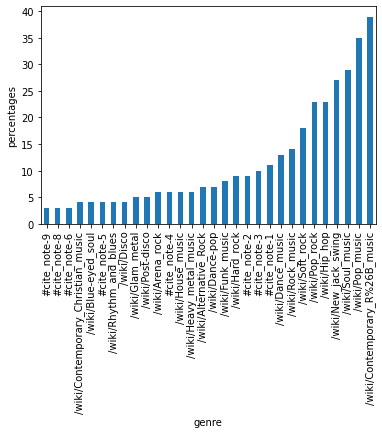

In [ ]:
ax = popularity.plot.bar(x = "genre", y = "percentage")
ax.set_xlabel("genre")
ax.set_ylabel("percentages")

1.2 How has the popularity of these 30 genres changed with time?

In [ ]:
# your code here 
popularity_1992 = finaldf[finaldf["year"] == 1992].drop(columns = ["year", "ranking"]).describe().iloc[1]*100 
popularity_1993 = finaldf[finaldf["year"] == 1993].drop(columns = ["year", "ranking"]).describe().iloc[1]*100  
popularity_2021 = finaldf[finaldf["year"] == 2021].drop(columns = ["year", "ranking"]).describe().iloc[1]*100 

Text(0, 0.5, 'percentages')

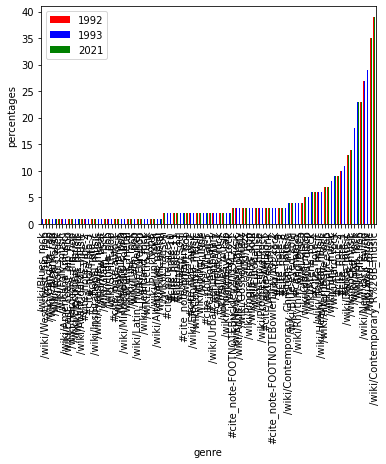

In [ ]:
lis = list(enc_dict.keys())
lis2 = [lis[i] for i in idx]
df = pd.DataFrame({'1992': popularity_1992,
                   '1993': popularity_1993,
                   '2021':popularity_2021}, index = lis2)
ax = df.plot.bar(rot=90, color = ["red", "blue", "green"])
ax.set_xlabel("genre")
ax.set_ylabel("percentages")

**What trends do you see?**

Write a paragraph, touching on which genres are the most popular, and how this popularity has changed over time.

R&B, Soul Music and Pop are the most popular genres. Moreover, their popularity has not changed over time.

#### Question 2: Who are the highest quality singers?

2.1 Who are the most occurring artists in Billboard's Top 100 list?



In [ ]:
# your code here 
most_occuring = billboardtop["band_singer"].value_counts()
print("Most occuring artists:\n", most_occuring.sort_values(ascending = False)[:1])

Most occuring artists:
 Boyz II Men    9
Name: band_singer, dtype: int64


Boys II Men are the most occuring artists

2.2 What if we used a different metric?

In [ ]:
billboardtop.head()

,year,ranking,titletext,song,songurl,band_singer,url
0,1992,1,End of the Road,End of the Road,/wiki/End_of_the_Road_(Boyz_II_Men_song),Boyz II Men,/wiki/Boyz_II_Men
72,1992,73,Blowing Kisses in the Wind,Blowing Kisses in the Wind,/wiki/Blowing_Kisses_in_the_Wind,Paula Abdul,/wiki/Paula_Abdul
71,1992,72,Everything About You,Everything About You,/wiki/Everything_About_You_(Ugly_Kid_Joe_song),Ugly Kid Joe,/wiki/Ugly_Kid_Joe
70,1992,71,Friday I'm in Love,Friday I'm in Love,/wiki/Friday_I%27m_in_Love,The Cure,/wiki/The_Cure
69,1992,70,Do I Have to Say the Words?,Do I Have to Say the Words?,/wiki/Do_I_Have_to_Say_the_Words%3F,Bryan Adams,/wiki/Bryan_Adams


In [ ]:
# your code here 
most_occuring_1992 = billboardtop["band_singer"][billboardtop["year"]==1992].value_counts()
print(most_occuring_1992[:1])
most_occuring_1993 = billboardtop["band_singer"][billboardtop["year"]==1993].value_counts()
print(most_occuring_1993[:1])
most_occuring_2021 = billboardtop["band_singer"][billboardtop["year"]==2021].value_counts()
print(most_occuring_2021[:1])

Boyz II Men    3
Name: band_singer, dtype: int64
Color Me Badd    3
Name: band_singer, dtype: int64
Color Me Badd    3
Name: band_singer, dtype: int64


**Do you notice any major differences when you change the metric?**

How have the singers at the top shifted places? Why do you think this is so?

If we use take into account the year, then there is a change. It is possible because a band/ singer might be famous at a certain time and lost popularity later.

2.3 What is the age at which singers achieve their top ranking?

In [ ]:
# your code here 
age = []
born = finaldf["born"].values
year_now = finaldf["year"].values
for i in range(len(born)):
  if born[i] != "None":
    age.append(year_now[i] - (int(born[i].split("-")[0])))

In [ ]:
print(age)

[1991, 1992, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1991, 1991, 1992, 1992, 1992, 2020, 2020, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1991, 1991, 1992, 1992, 1992, 2020, 2020, 2020, 1991, 1992, 2020, 1991, 1991, 1991, 1992, 1992, 1992, 2020, 2020, 2020, 1991, 1992, 2020, 1991, 1991, 1991, 1992, 1992, 1992, 2020, 2020, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1991, 1992, 1992, 2020, 2020, 1991, 1991, 1992, 1992, 2020, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1991, 1992, 1992, 2020, 2020, 1991, 1991, 1991, 1992, 1992, 1992, 2020, 2020, 2020, 1991, 1991, 1992, 1992, 2020, 2020, 1991, 1991, 1991, 1992, 1992, 1992, 2020, 2020, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1991, 1992, 1992, 2020, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1992, 2020, 1991, 1992, 2020]


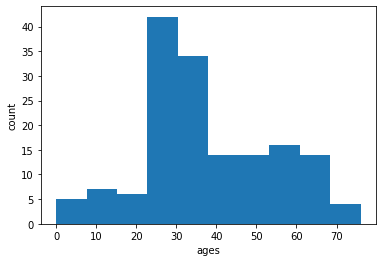

In [ ]:
# your code here 
fig,ax = plt.subplots()
ax.hist(age)
ax.set_xlabel("ages")
ax.set_ylabel("count")
fig.show()

In [ ]:
from statistics import mode
print(f"Age where singers/bands reach prime: {mode(age)}")

Age where singers/bands reach prime: 30


**What do you infer from the last two questions?**

It can be inferred that there is a certain age at which bands/ singers reach their prime.